<a href="https://colab.research.google.com/github/tubagusibrohim/Visualisasi-Data/blob/main/2_Visualization_Tools_1_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment

Import necessary library

In [ ]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Read the data

In [ ]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

Drop unnecessary columns

In [ ]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603


Rename columns title

In [ ]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


Add a 'Total' column

In [ ]:
df_can['Total'] = df_can.sum(axis=1)

**Question 1:** Let's compare the number of immigrants from India and China from 1980 to 2013.


Step 1: Get the data set for China and India, and display dataframe.

In [ ]:
### type your answer here

df = df_can.set_index('Country')
years = list(map(int, range(1980, 2013)))
print(df.loc['China', years],df.loc['India', years])


1980     5123
1981     6682
1982     3308
1983     1863
1984     1527
1985     1816
1986     1960
1987     2643
1988     2758
1989     4323
1990     8076
1991    14255
1992    10846
1993     9817
1994    13128
1995    14398
1996    19415
1997    20475
1998    21049
1999    30069
2000    35529
2001    36434
2002    31961
2003    36439
2004    36619
2005    42584
2006    33518
2007    27642
2008    30037
2009    29622
2010    30391
2011    28502
2012    33024
Name: China, dtype: object 1980     8880
1981     8670
1982     8147
1983     7338
1984     5704
1985     4211
1986     7150
1987    10189
1988    11522
1989    10343
1990    12041
1991    13734
1992    13673
1993    21496
1994    18620
1995    18489
1996    23859
1997    22268
1998    17241
1999    18974
2000    28572
2001    31223
2002    31889
2003    27155
2004    28235
2005    36210
2006    33848
2007    28742
2008    28261
2009    29456
2010    34235
2011    27509
2012    30933
Name: India, dtype: object
Display of dataframe: 

Step 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`.

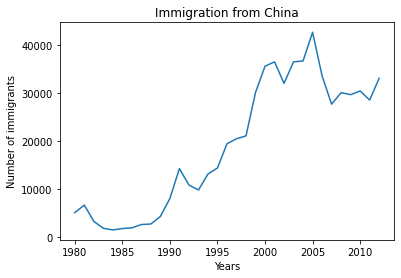

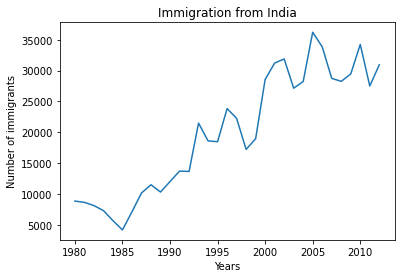

In [ ]:
### type your answer here
import matplotlib.pyplot as plt
import matplotlib as mpl

df.loc['China', years].plot()
plt.title('Immigration from China')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.show()

df.loc['India', years].plot()
plt.title('Immigration from India')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.show()

**Question 2:** Compare the trend of top 5 countries that contributed the most to immigration to Canada.

In [ ]:
### type your answer here
df.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top5 = df.head(5)
df_top5 = df_top5[years].transpose()
print(df_top5)

Country  India  China  ...  Philippines  Pakistan
1980      8880   5123  ...         6051       978
1981      8670   6682  ...         5921       972
1982      8147   3308  ...         5249      1201
1983      7338   1863  ...         4562       900
1984      5704   1527  ...         3801       668
1985      4211   1816  ...         3150       514
1986      7150   1960  ...         4166       691
1987     10189   2643  ...         7360      1072
1988     11522   2758  ...         8639      1334
1989     10343   4323  ...        11865      2261
1990     12041   8076  ...        12509      2470
1991     13734  14255  ...        12718      3079
1992     13673  10846  ...        13670      4071
1993     21496   9817  ...        20479      4777
1994     18620  13128  ...        19532      4666
1995     18489  14398  ...        15864      4994
1996     23859  19415  ...        13692      9125
1997     22268  20475  ...        11549     13073
1998     17241  21049  ...         8735      9068


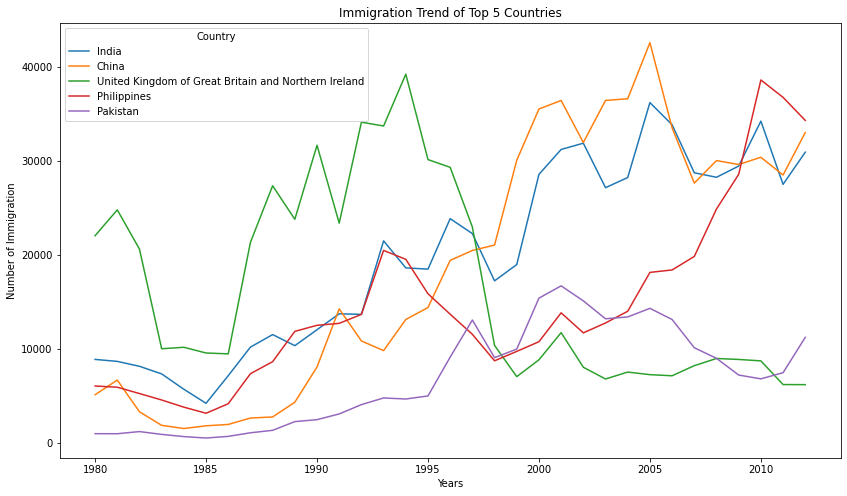

In [ ]:
### type your answer here
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='line', figsize=(14,8))
 
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigration')
plt.xlabel('Years')
plt.show()


**Question 3**: Create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.55.

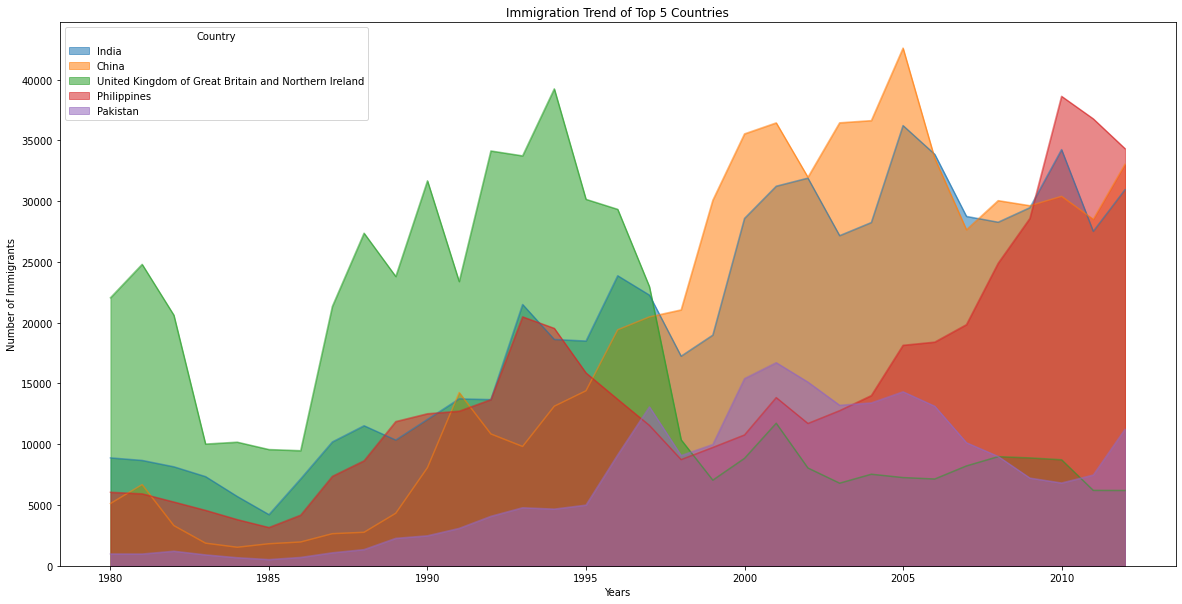

In [ ]:
### type your answer here
df.sort_values(['Total'], ascending = False, axis = 0, inplace = True)
df_top5 = df.head()
df_top5 = df_top5[years].transpose()
df_top5.head()

df_top5.plot(kind='area', 
             alpha=0.55, 
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()


**Question 4**: Display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

Text(0.5, 0, 'Number of Immigrants')

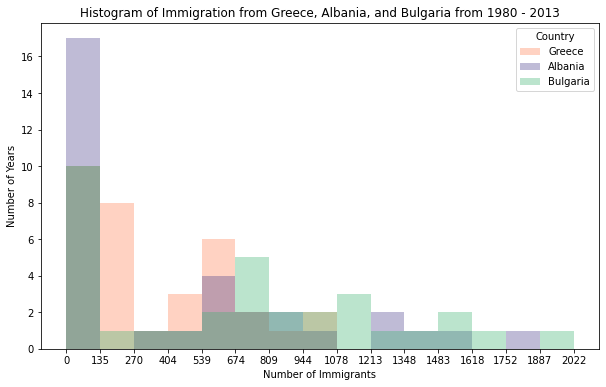

In [ ]:
### type your answer here
df_cof = df.loc[['Greece', 'Albania', 'Bulgaria'], years]
df_cof = df_cof.transpose() 
count, bin_edges = np.histogram(df_cof, 15)
df_cof.plot(kind ='hist',
            figsize=(10, 6),
            bins=15,
            alpha=0.35,
            xticks=bin_edges,
            color=['coral', 'darkslateblue', 'mediumseagreen']
            )

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')




**Question 5:** Create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

Step 1: Get the data pertaining to the top 15 countries.

In [ ]:
### type your answer here
df.sort_values(by='Total', ascending=True, inplace=True)
df_top15 = df['Total'].tail(15)




Step 2: Plot data:
   1. Use `kind='barh'` to generate a bar chart with horizontal bars.
   2. Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
   3. Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface.

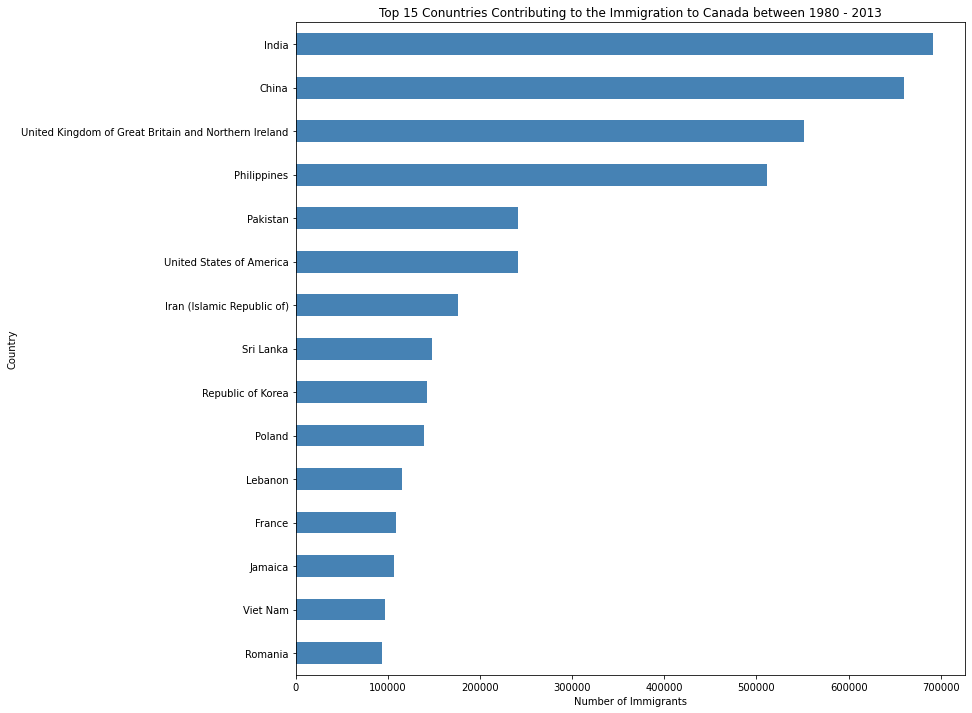

In [ ]:
### type your answer here
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

for index, value in enumerate(df_top15): 
    label = format(int(value), ',')

plt.show()




# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).